In [1]:
from IPython.core.display import Markdown, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

import sys
import os
from os import path

from plot_in_out_dist import plot_in_out_dist

In [2]:
# class PerformanceMetric:
#     def __init__(name, f):
#         self.name = name
#         self.f = f

# class PerformanceModel:
#     def __init__(M, S, E):
#         self.M = M
#         self.S = S
#         self.E = E

# C_A = PerformanceModel([])

x [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
y [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
z [0.69314718 2.83321334 4.40671925 5.54907608 6.43935037 7.16780918
 7.784057   8.31801028 8.78905071 9.21044037]


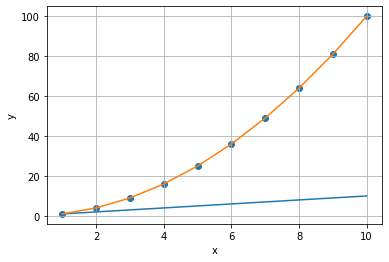

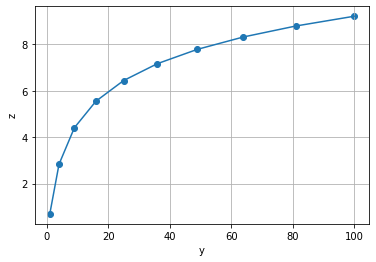

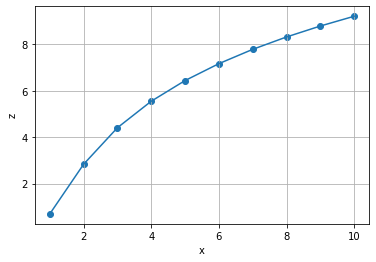

In [3]:
x = np.arange(1, 10.1, 1)
y = x**2
z = np.log(1 + y**2)

print('x', x)
print('y', y)
print('z', z)

plt.plot(x, y**.5)
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

plt.plot(y, z)
plt.scatter(y, z)
plt.xlabel('y')
plt.ylabel('z')
plt.grid()
plt.show()

plt.plot(x, z)
plt.scatter(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
plt.show()

In [4]:
def est(d, x, y, x_bin_width):
    
    if x_bin_width:
        bins_x = np.arange(0., d[x].max() + x_bin_width, x_bin_width)
        d['x_range'] = pd.cut(d[x], bins_x, labels=bins_x[:-1]).astype('float')
    else:
        bins_x = sorted(d[x].unique())
        d['x_range'] = d[x]

#     if y_bin_width:
#         bins_y = np.arange(0., y_metric.max() + y_bin_width, y_bin_width)
#         df_notna['y_range'] = pd.cut(df_notna[y_metric.name], bins_y, labels=bins_y[:-1]).astype('float')
#     else:
#         bins_y = sorted(y_metric.unique())
#         df_notna['y_range'] = df_notna[y_metric.name]
    
    df_g = d.groupby(['x_range'])[y].mean()
#     df_g = df_notna.groupby(['x_range', 'y_range']).count()[y_metric.name]

    return df_g.index.values + x_bin_width/2, df_g.values


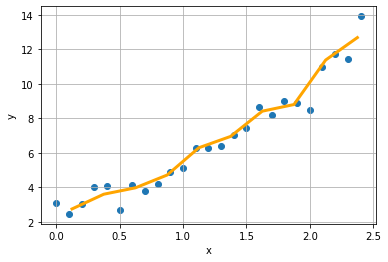

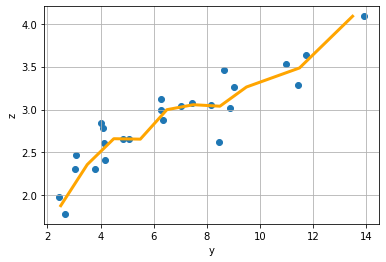

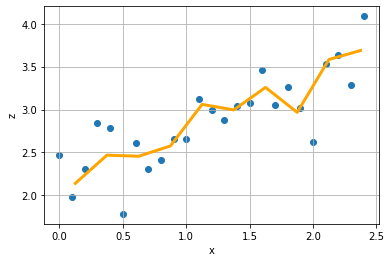

In [5]:

# d1 = pd.DataFrame({'x': np.arange(0.0, 10, 0.1)})
# d1['y'] = (d1.x + np.random.normal(0.0, 0.5, len(d1.x)))**2
# d1['z'] = np.log(1 + d1.y**2) + np.random.normal(0.0, 0.5, len(d1.y))


t_xy = lambda x: 1 + (1 + x)**2
t_yx = lambda y: np.sqrt(y - 1) - 1

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(0.0, 2.5, 0.1)})
np.random.seed(0)
d1['y'] = t_xy(d1.x) + np.random.normal(0.0, 0.6, len(d1.x))
np.random.seed(0)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, 0.2, len(d1.y))


x_est_1, y_est_1 = est(d1, 'x', 'y', .25)

plt.plot(x_est_1, y_est_1, color='orange', linewidth=3)
plt.scatter(d1.x, d1.y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

y_est_2, z_est_2 = est(d1, 'y', 'z', 1)

plt.plot(y_est_2, z_est_2, color='orange', linewidth=3)
plt.scatter(d1.y, d1.z)
plt.xlabel('y')
plt.ylabel('z')
plt.grid()
plt.show()

x_est_3, z_est_3 = est(d1, 'x', 'z', .25)

plt.plot(x_est_3, z_est_3, color='orange', linewidth=3)
plt.scatter(d1.x, d1.z)
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
plt.show()


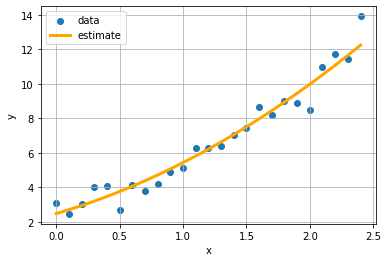

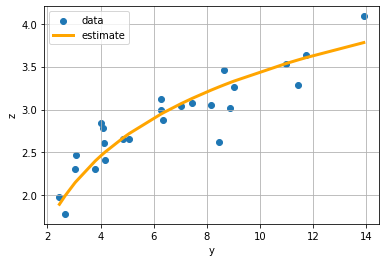

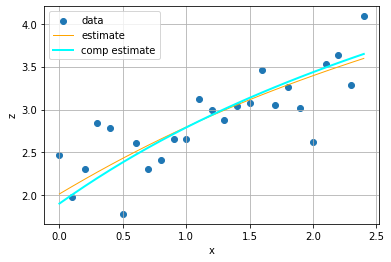

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

t_xy = lambda x: 1 + (1 + x)**2
t_yx = lambda y: np.sqrt(y - 1) - 1

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(0.0, 2.5, 0.1)})
np.random.seed(0)
d1['y'] = t_xy(d1.x) + np.random.normal(0.0, 0.6, len(d1.x))
np.random.seed(0)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, 0.2, len(d1.y))


d1_1 = d1.sort_values(by='x')
x_est_1 = d1_1.x.values
model_1 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(x_est_1.reshape(-1, 1), t_yx(d1.y))
y_est_1 = t_xy(model_1.predict(x_est_1.reshape(-1, 1)))

plt.scatter(d1.x, d1.y, label='data')
plt.plot(x_est_1, y_est_1, color='orange', linewidth=3, label='estimate')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

d1_2 = d1.sort_values(by='y')
y_est_2 = d1_2.y.values
model_2 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(y_est_2.reshape(-1, 1), t_zy(d1_2.z))
z_est_2 = t_yz(model_2.predict(y_est_2.reshape(-1, 1)))

plt.scatter(d1.y, d1.z, label='data')
plt.plot(y_est_2, z_est_2, color='orange', linewidth=3, label='estimate')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()

d1_3 = d1.sort_values(by='x')
x_est_3 = d1_3.x.values
model_3 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(x_est_3.reshape(-1, 1), t_yx(t_zy(d1_2.z)))
z_est_3 = t_yz(t_xy(model_3.predict(x_est_3.reshape(-1, 1))))

plt.scatter(d1.x, d1.z, label='data')
plt.plot(x_est_3, z_est_3, color='orange', linewidth=1, label='estimate')


y_comp_est = t_xy(model_1.predict(x_est_1.reshape(-1, 1)))
# z_comp_est_3 = t_yz(t_xy(model_3.predict(x_est_3.reshape(-1, 1))))
z_comp_est = t_yz(model_2.predict(y_comp_est.reshape(-1, 1)))

plt.plot(x_est_1, z_comp_est, color='cyan', linewidth=2, label='comp estimate')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()

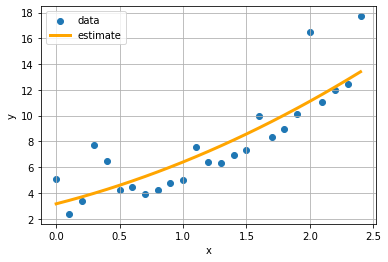

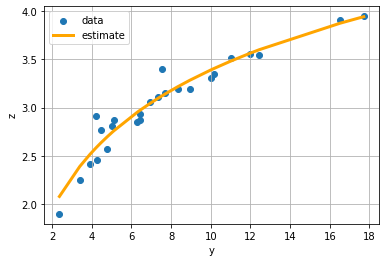

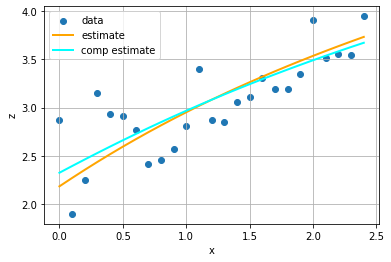

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

t_xy = lambda x: 1 + (1 + x)**2
t_yx = lambda y: np.sqrt(y - 1) - 1

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(0.0, 2.5, 0.1)})
np.random.seed(0)
d1['y'] = t_xy(d1.x) + np.random.normal(0.0, 1, len(d1.x))**2
np.random.seed(1)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .3, len(d1.y))**2


d1_1 = d1.sort_values(by='x')
x_est_1 = d1_1.x.values
model_1 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(x_est_1.reshape(-1, 1), t_yx(d1.y))
y_est_1 = t_xy(model_1.predict(x_est_1.reshape(-1, 1)))

plt.scatter(d1.x, d1.y, label='data')
plt.plot(x_est_1, y_est_1, color='orange', linewidth=3, label='estimate')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

d1_2 = d1.sort_values(by='y')
y_est_2 = d1_2.y.values
model_2 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(y_est_2.reshape(-1, 1), t_zy(d1_2.z))
z_est_2 = t_yz(model_2.predict(y_est_2.reshape(-1, 1)))

plt.scatter(d1.y, d1.z, label='data')
plt.plot(y_est_2, z_est_2, color='orange', linewidth=3, label='estimate')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()

d1_3 = d1.sort_values(by='x')
x_est_3 = d1_3.x.values
model_3 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(x_est_3.reshape(-1, 1), t_yx(t_zy(d1_2.z)))
z_est_3 = t_yz(t_xy(model_3.predict(x_est_3.reshape(-1, 1))))

plt.scatter(d1.x, d1.z, label='data')
plt.plot(x_est_3, z_est_3, color='orange', linewidth=2, label='estimate')


y_comp_est = t_xy(model_1.predict(x_est_1.reshape(-1, 1)))
z_comp_est = t_yz(model_2.predict(y_comp_est.reshape(-1, 1)))

plt.plot(x_est_1, z_comp_est, color='cyan', linewidth=2, label='comp estimate')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()

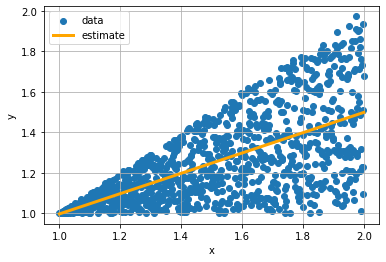

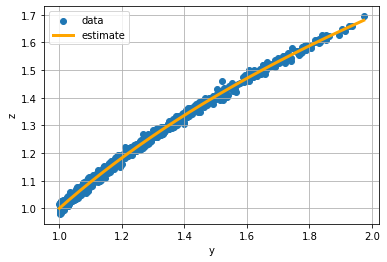

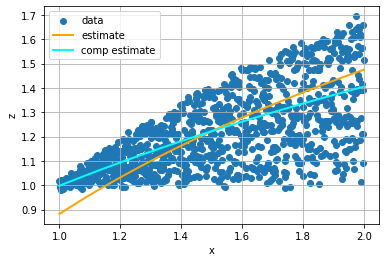

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(1.0, 2.0, 0.001)})
np.random.seed(0)
d1['y'] = np.random.uniform(1.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
# d1['z'] = t_yz(d1.y)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))


d1_1 = d1.sort_values(by='x')
x_est_1 = d1_1.x.values
model_1 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(x_est_1.reshape(-1, 1), t_yx(d1.y))
y_est_1 = t_xy(model_1.predict(x_est_1.reshape(-1, 1)))

plt.scatter(d1.x, d1.y, label='data')
plt.plot(x_est_1, y_est_1, color='orange', linewidth=3, label='estimate')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

d1_2 = d1.sort_values(by='y')
y_est_2 = d1_2.y.values
model_2 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(y_est_2.reshape(-1, 1), t_zy(d1_2.z))
z_est_2 = t_yz(model_2.predict(y_est_2.reshape(-1, 1)))

plt.scatter(d1.y, d1.z, label='data')
plt.plot(y_est_2, z_est_2, color='orange', linewidth=3, label='estimate')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()

d1_3 = d1.sort_values(by='x')
x_est_3 = d1_3.x.values
model_3 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(x_est_3.reshape(-1, 1), t_yx(t_zy(d1_2.z)))
z_est_3 = t_yz(t_xy(model_3.predict(x_est_3.reshape(-1, 1))))

plt.scatter(d1.x, d1.z, label='data')
plt.plot(x_est_3, z_est_3, color='orange', linewidth=2, label='estimate')


y_comp_est = t_xy(model_1.predict(x_est_1.reshape(-1, 1)))
z_comp_est = t_yz(model_2.predict(y_comp_est.reshape(-1, 1)))

plt.plot(x_est_1, z_comp_est, color='cyan', linewidth=2, label='comp estimate')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.show()

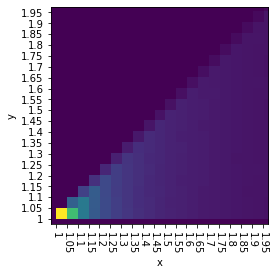

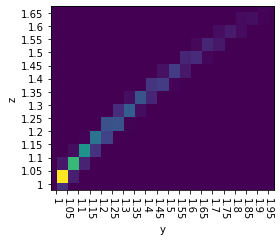

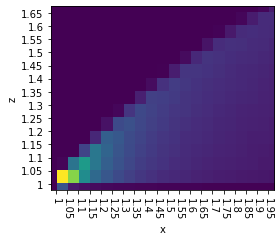

In [20]:

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(1.0, 2.0, 0.000001)})
np.random.seed(0)
d1['y'] = np.random.uniform(1.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
# d1['z'] = t_yz(d1.y)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))

plot_in_out_dist(
    x_metric=d1.x,
    y_metric=d1.y,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
    x_lim=(0.95, 1.95),
    y_lim=(0.95, 1.95),
    out_dir="example_plots",
)
plot_in_out_dist(
    x_metric=d1.y,
    y_metric=d1.z,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
    x_lim=(0.95, 1.95),
    y_lim=(0.95, 1.65),
    out_dir="example_plots",
)
plot_in_out_dist(
    x_metric=d1.x,
    y_metric=d1.z,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
    x_lim=(0.95, 1.95),
    y_lim=(0.95, 1.65),
    out_dir="example_plots",
)

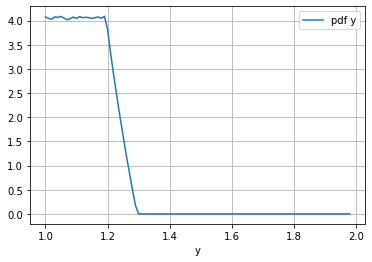

True


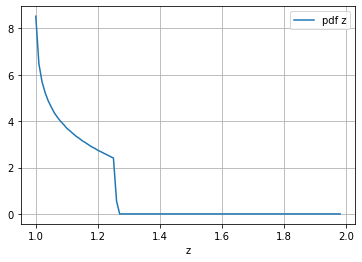

True


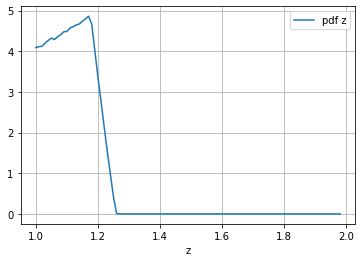

True


In [23]:

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(1.0, 2.0, 0.0000001)})
np.random.seed(0)
d1['y'] = np.random.uniform(1.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
d1['z'] = t_yz(d1.y)
# d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))

b_y_size = 0.01
y_count, y_bins = np.histogram(d1[d1.x.between(1.2, 1.3)].y, bins=np.arange(1, 2, b_y_size))
pdf_y = y_count / np.sum(y_count) / b_y_size
plt.plot(y_bins[:-1], pdf_y, label='pdf y')
plt.xlabel('y')
# plt.ylabel('pdf(y)')
plt.legend()
plt.grid()
plt.show()
print(np.sum(pdf_y*b_y_size) > .999) # integral of pdf == 1


b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.y.between(1.0, 1.3)].z, bins=np.arange(1, 2, b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1


b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.x.between(1.2, 1.3)].z, bins=np.arange(1, 2, b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1